<a href="https://colab.research.google.com/github/MockaWolke/SVI_Model_ToolBox/blob/master/ND_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/MockaWolke/SVI_Model_ToolBox.git
from google.colab import drive
import tensorflow as tf
import pandas as pd
import numpy as np
import tensorflow_datasets as tfds
import os
import matplotlib.pyplot as plt
os.chdir("SVI_Model_ToolBox/night_detection_task")
!mkdir ND_Detection_Results

Cloning into 'SVI_Model_ToolBox'...
remote: Enumerating objects: 2777, done.
remote: Counting objects: 100% (2504/2504), done.
remote: Compressing objects: 100% (2500/2500), done.
remote: Total 2777 (delta 6), reused 2498 (delta 4), pack-reused 273
Receiving objects: 100% (2777/2777), 143.75 MiB | 17.49 MiB/s, done.
Resolving deltas: 100% (116/116), done.
Checking out files: 100% (2572/2572), done.


In [2]:
import get_ds_test
test_ds = get_ds_test.get_ds()
model = tf.keras.models.load_model("day_night_final/")
df = pd.read_csv("Relabeled_Test_DS/cleaned_data.csv",index_col=0)
labels = df["Label"].apply(lambda x : int(x == "Night")).values
model.evaluate(test_ds.batch(64))

39/39 [==============================] - 14s 39ms/step - loss: 0.0919 - accuracy: 0.9762


[0.09188574552536011, 0.976190447807312]

In [3]:
input = model.input
x = input
for layer in model.layers[2:]:

  x = layer(x)

with_out_aug = tf.keras.models.Model(input,x)
with_out_aug.compile(optimizer=tf.keras.optimizers.Adam(),loss = "binary_crossentropy",metrics=["accuracy"])
preds = np.argmax(with_out_aug.predict(test_ds.batch(64)),axis=1)
!mkdir ND_Detection_Results/final_model
!mkdir ND_Detection_Results/final_model_with_aug
model.save("ND_Detection_Results/final_model_with_aug/")
with_out_aug.save("ND_Detection_Results/final_model/")
with_out_aug.evaluate(test_ds.batch(64))

INFO:tensorflow:Assets written to: ND_Detection_Results/final_model_with_aug/assets
INFO:tensorflow:Assets written to: ND_Detection_Results/final_model/assets
39/39 [==============================] - 2s 37ms/step - loss: 0.0919 - accuracy: 0.9762


[0.09188574552536011, 0.976190447807312]

In [4]:
failure_mask = preds != labels
failed_images = df[failure_mask]
wrong_preds = preds[failure_mask]
wrong_labels = labels[failure_mask]
len(failed_images)

59

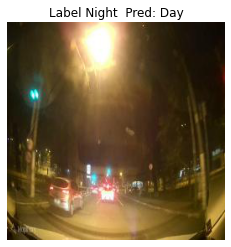

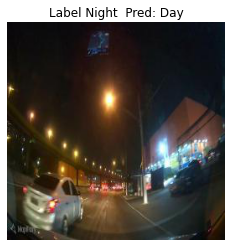

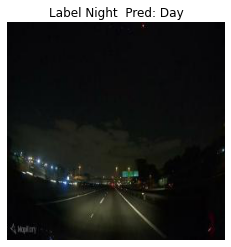

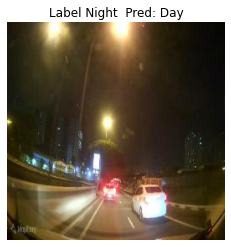

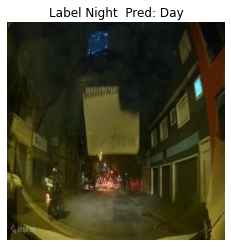

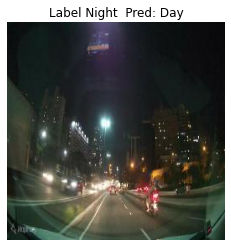

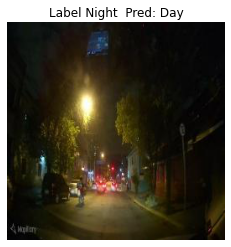

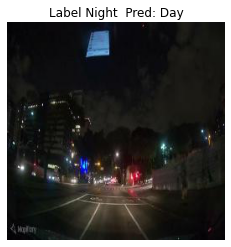

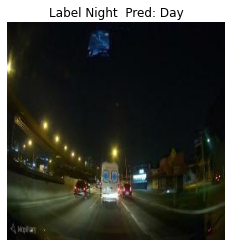

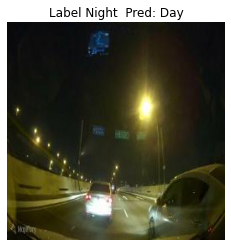

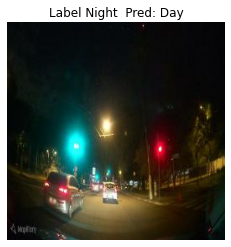

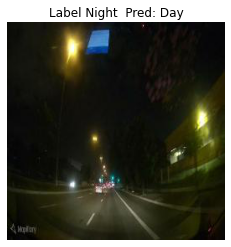

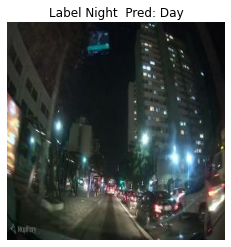

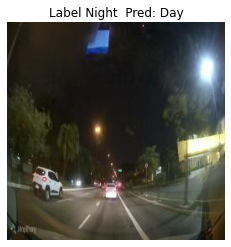

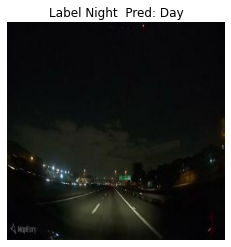

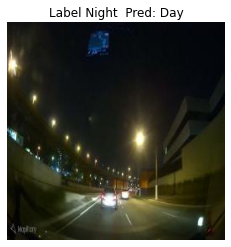

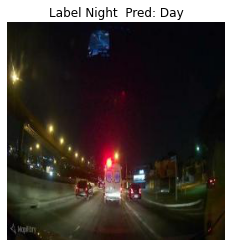

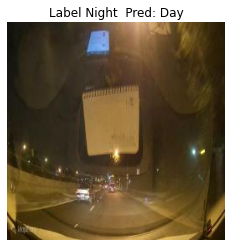

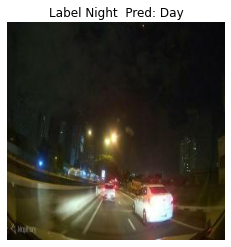

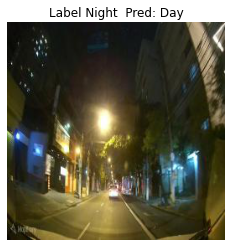

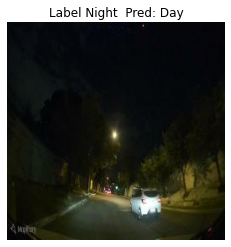

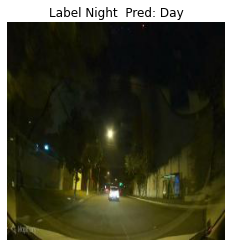

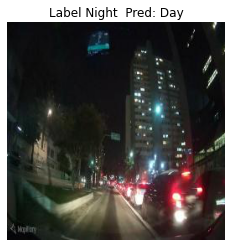

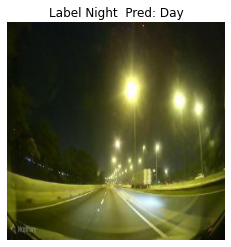

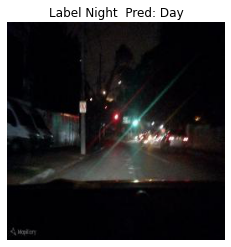

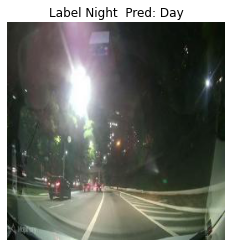

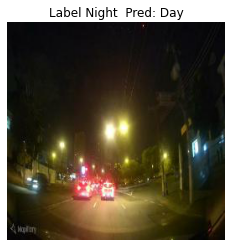

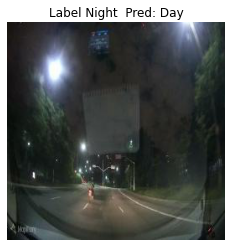

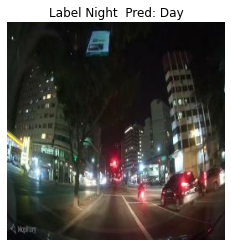

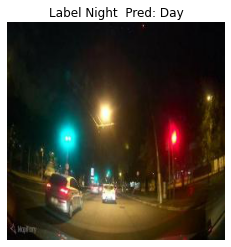

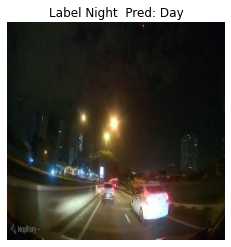

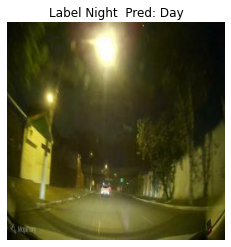

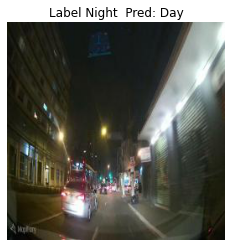

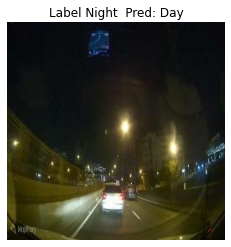

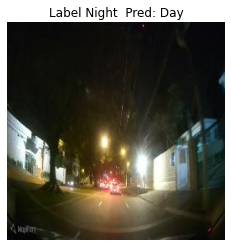

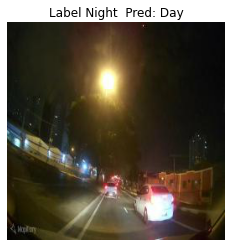

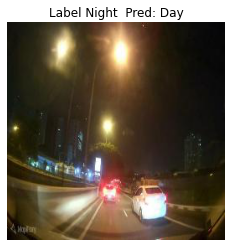

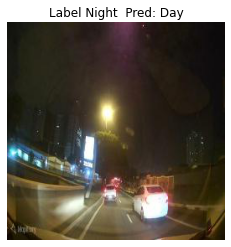

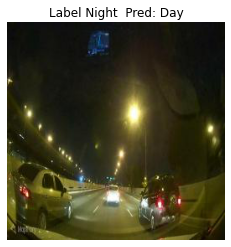

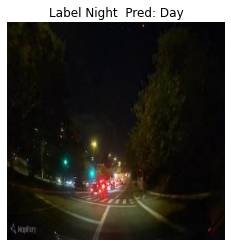

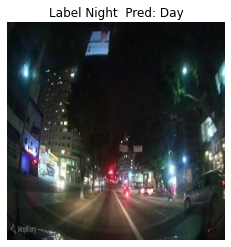

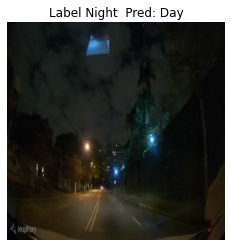

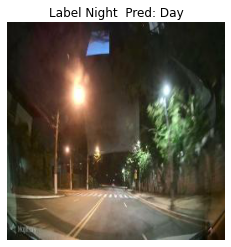

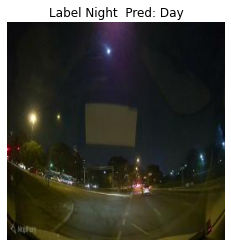

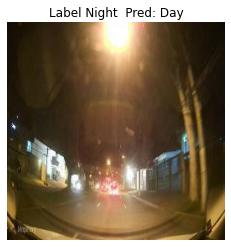

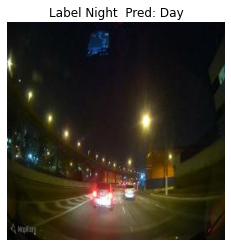

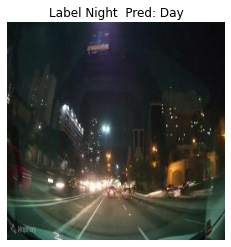

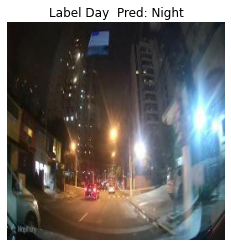

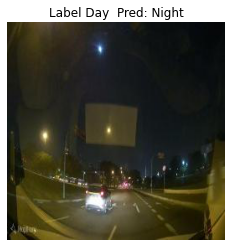

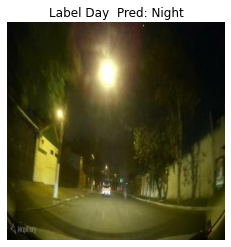

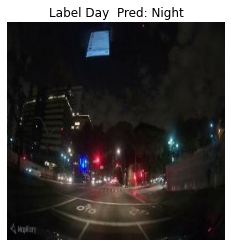

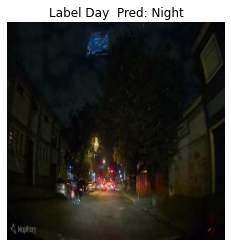

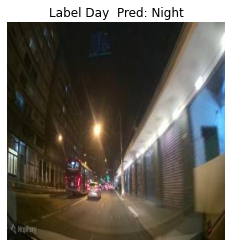

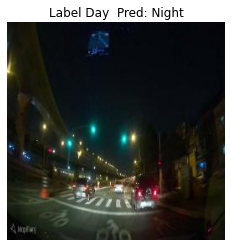

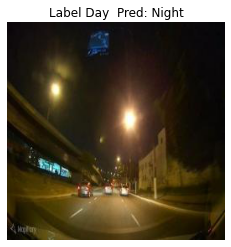

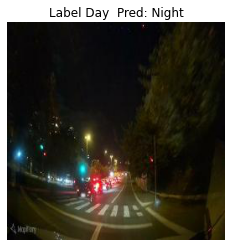

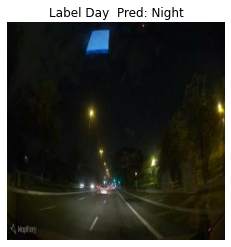

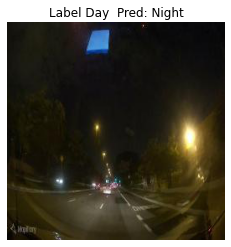

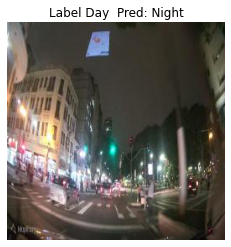

In [5]:
!mkdir ND_Detection_Results/wrong_labels
dic = {0:"Day",1:"Night"}
for i in range(len(failed_images.index)):

    image_paths = "Relabeled_Test_DS/" + df.iloc[i,0] +"/" + df.index[i] + ".jpg"
    plt.imshow(plt.imread(image_paths))
    plt.axis('off')

    label = dic[wrong_labels[i]]
    pred = dic[wrong_preds[i]]

    plt.title(f"Label {label}  Pred: {pred}")
    plt.savefig(f"ND_Detection_Results/wrong_labels/{df.index[i]}.jpg")
    plt.show()


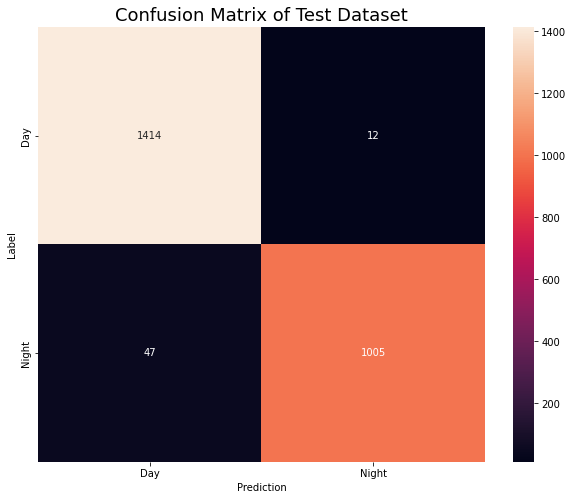

In [6]:
confusion_mtx = tf.math.confusion_matrix(labels,preds)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))

names = list(dic.values())

sns.heatmap(confusion_mtx, xticklabels=names, yticklabels=names, 
          annot=True, fmt='g')
plt.title("Confusion Matrix of Test Dataset",fontsize=18)
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.savefig("ND_Detection_Results/confusion_matrix.jpg")
plt.show()

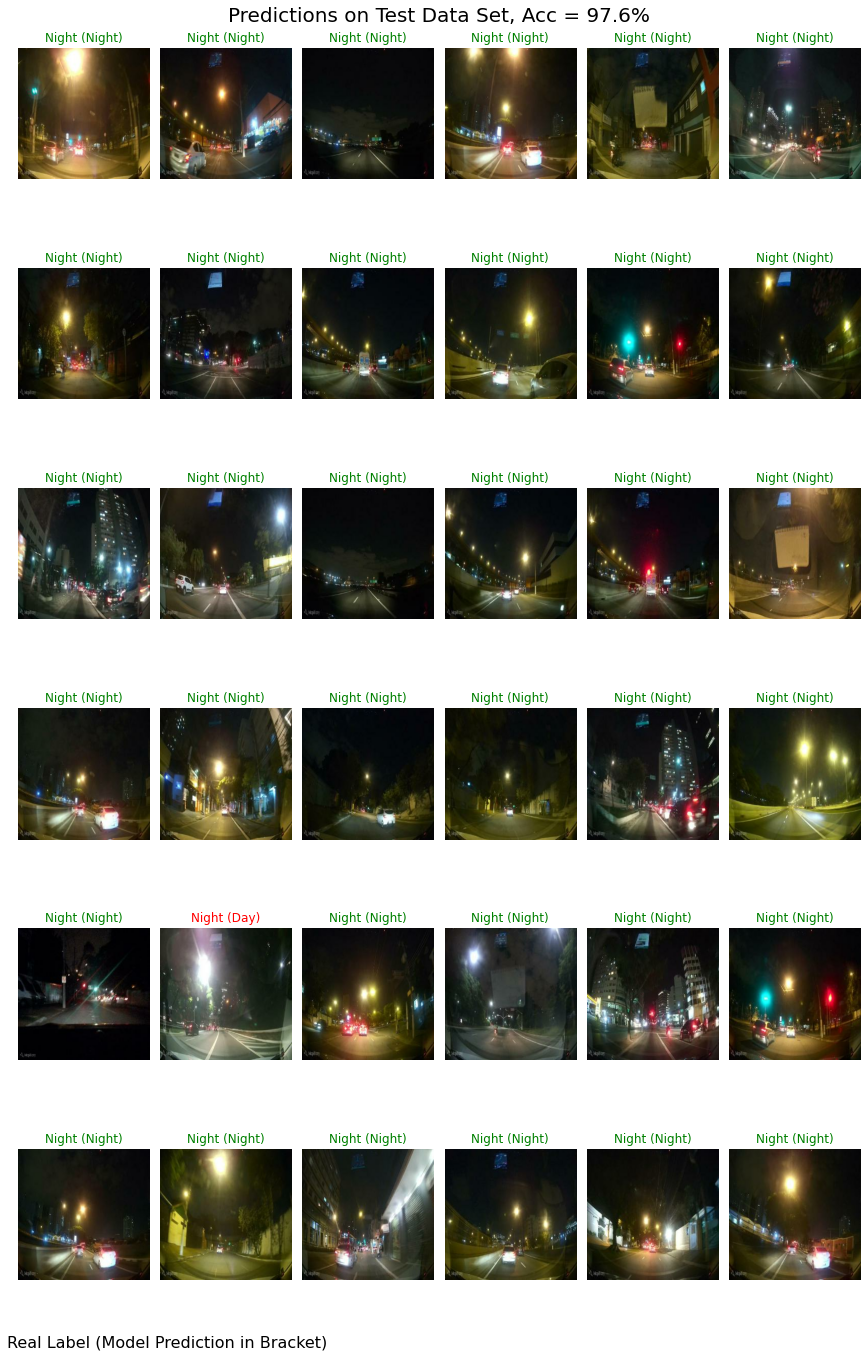

In [7]:
imgs = list([i[0].numpy() for i in test_ds])
n_row, n_col = 6,6

n_imgs = n_row * n_col

get_names = dic

_, axs = plt.subplots(n_row, n_col, figsize=(12, 19))
axs = axs.flatten()

for i in range(n_imgs):
    ax = axs[i]
    
    l = get_names[labels[i]]
    p = get_names[preds[i]]
    color = "green" if l==p else "red"
    
    ax.imshow(imgs[i])
    ax.axis("off")
    ax.set_title(f"{l} ({p})",color=color)
    
plt.suptitle("Predictions on Test Data Set, Acc = 97.6%",fontsize=20)
plt.figtext(0,0,"Real Label (Model Prediction in Bracket)",fontsize=16)
plt.tight_layout()
plt.savefig("ND_Detection_Results/Predictions.jpg")
plt.show()

In [8]:
!zip -r ND_Detection_Results.zip ND_Detection_Results
from google.colab import files
files.download("ND_Detection_Results.zip")

  adding: ND_Detection_Results/ (stored 0%)
  adding: ND_Detection_Results/final_model_with_aug/ (stored 0%)
  adding: ND_Detection_Results/final_model_with_aug/variables/ (stored 0%)
  adding: ND_Detection_Results/final_model_with_aug/variables/variables.data-00000-of-00001 (deflated 10%)
  adding: ND_Detection_Results/final_model_with_aug/variables/variables.index (deflated 66%)
  adding: ND_Detection_Results/final_model_with_aug/keras_metadata.pb (deflated 92%)
  adding: ND_Detection_Results/final_model_with_aug/saved_model.pb (deflated 90%)
  adding: ND_Detection_Results/final_model_with_aug/assets/ (stored 0%)
  adding: ND_Detection_Results/wrong_labels/ (stored 0%)
  adding: ND_Detection_Results/wrong_labels/0F5MwFjzEg3e0tlu3UC4tj.jpg (deflated 7%)
  adding: ND_Detection_Results/wrong_labels/2d1Yt-Pem8OsGiG5nDTPGG.jpg (deflated 6%)
  adding: ND_Detection_Results/wrong_labels/TNvQxYSTHHVbip3ZZi_k3m.jpg (deflated 7%)
  adding: ND_Detection_Results/wrong_labels/RvSvH8ygj6ux2ndc30Dn8

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>